### Assignment 1

Let us create perovskite structures using Pymatgen. For the cubic perovskite phase of type $\mathrm{ABO}_3,$ A is located at the corners of the cube (fractional coordinates: 0, 0, 0) [green], B is located at the body center (fractional coordinates: 0.5, 0.5, 0.5) [gray], and oxygen is located at the face centers (fractional coordinates: 0.5, 0.5, 0; 0.5, 0, 0.5; and 0, 0.5, 0.5) [red]. The tetragonal phase looks similar, just that the c unit cell vector is now longer than the a/b vectors. See the illustration below (taken from [here](https://www.nature.com/articles/s41524-024-01496-z)).

![Cubic and tetragonal pervoskite structures](./perovskite_structure.jpg)

Please, create a function that generates the Pymatgen structures of both the cubic and tetragonal pervoskite phases. In the function, the user should be able to specify the element for A, the element for B, the c/a ratio for the tetragonal phase and whether or not CIF files should be saved for the structures. Please, also check that the spacegroups of the two generated structures are correct. 

Run your function for the example `A="Ba"`, `B="Ti"`, and `c_to_a_ratio=1.3` and add the generated CIFs to your repository submission.

The function should look something like this:

```Python
def generate_perovskites(A: str, B: str, c_to_a_ratio: float, save_cifs: bool = True) -> (Structure, Structure):
    # Your code here:
    # Create both structures
    # Check that both generated structures exhibit the correct spacegroups (see image above)
    if save_cifs:
        # save both structures as cifs
    return cubic_pervoskite, tetragonal_perovskite

cperov, tperov = generate_perovskites("Ba", "Ti", 1.3)
print(cperov)
print(tperov)

In [4]:
from pymatgen.core import Structure, Lattice
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

def generate_perovskites(A: str, B: str, c_to_a_ratio: float, save_cifs: bool = True) -> (Structure, Structure):
    a_cubic = 4.0  # Example lattice parameter for cubic perovskite
    a_tetragonal = a_cubic
    c_tetragonal = a_cubic * c_to_a_ratio

    cubic_lattice = Lattice.cubic(a_cubic)
    lattice = cubic_lattice
    species = [A, B, 'O', 'O', 'O']
    coords = [[0,0,0],[0.5,0.5,0.5],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]]
    cubic_perovskite = Structure(lattice, species, coords)

    tetragonal_lattice = Lattice.tetragonal(a_tetragonal, c_tetragonal)
    lattice = tetragonal_lattice
    species = [A, B, 'O', 'O', 'O']
    coords = [[0,0,0],[0.5,0.5,0.5],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]]
    tetragonal_perovskite = Structure(lattice, species, coords)

    spg_cubic = SpacegroupAnalyzer(cubic_perovskite)
    spg_tetragonal = SpacegroupAnalyzer(tetragonal_perovskite)
    print(f'Cubic Space Group Symbol: {spg_cubic.get_space_group_symbol()}')
    print(f'Tetragonal Space Group Symbol: {spg_tetragonal.get_space_group_symbol()}')

    if save_cifs:
        cubic_perovskite.to(filename=f"{A}{B}O3_cubic.cif")
        tetragonal_perovskite.to(filename=f"{A}{B}O3_tetragonal.cif")
    return cubic_perovskite, tetragonal_perovskite

cperov, tperov = generate_perovskites("Ba", "Ti", 1.3)
print(cperov)
print(tperov)

Cubic Space Group Symbol: Pm-3m
Tetragonal Space Group Symbol: P4/mmm
Full Formula (Ba1 Ti1 O3)
Reduced Formula: BaTiO3
abc   :   4.000000   4.000000   4.000000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ba    0    0    0
  1  Ti    0.5  0.5  0.5
  2  O     0.5  0.5  0
  3  O     0.5  0    0.5
  4  O     0    0.5  0.5
Full Formula (Ba1 Ti1 O3)
Reduced Formula: BaTiO3
abc   :   4.000000   4.000000   5.200000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ba    0    0    0
  1  Ti    0.5  0.5  0.5
  2  O     0.5  0.5  0
  3  O     0.5  0    0.5
  4  O     0    0.5  0.5


### Assignment 2

Using `MPRester`, query for all materials that are not metals and that are not theoretical. Request the fields `'material_id', 'band_gap', 'symmetry'` as well as a **field that contains the information whether or not the material has a direct band gap or not**. The list of all possible fields (and query constraints) can be found [here](https://api.materialsproject.org/docs), under the summary endpoint (`/materials/summary/`, see screenshot below). Click on that and scroll down to `_fields` to see a full list of possible fields that you can request for your query (identify the one which returns the information on whether a material has a direct or indirect band gap).

![MP Swagger UI for detailed information on Summary endpoint queries](./MP_Swagger_UI.jpg)

When this data is stored in the variable `data`, restructure the data with the code we saw during the lecture:

```Python
flattened = [{k: v for k, v in dict(d).items() if v is not None} for d in data]
mpids = pd.DataFrame.from_records(flattened)
mpids['symmetry.crystal_system'] = mpids['symmetry'].apply(lambda x: str(x.crystal_system).lower())
mpids = mpids.dropna(axis=1, how='all')
mpids = mpids.drop(columns=['symmetry', 'fields_not_requested'])
mpids.to_csv('mp_hw_data.csv')  # optionally saving to a csv file (so you don't have to re-query the data)
```

Now, working with the `mpids` dataframe, please plot the percentage of materials in each crystal system (stored in column `'symmetry.crystal_system'`) that has a direct band gap (using the information in column `is_gap_direct`). What trends do you observe?

Now plot the average band gap for the two categoies `"Direct Band Gap"` and `"Indirect Band gap"`. Do you observe a pronounced difference or not?

Retrieving SummaryDoc documents:   0%|          | 0/27347 [00:00<?, ?it/s]

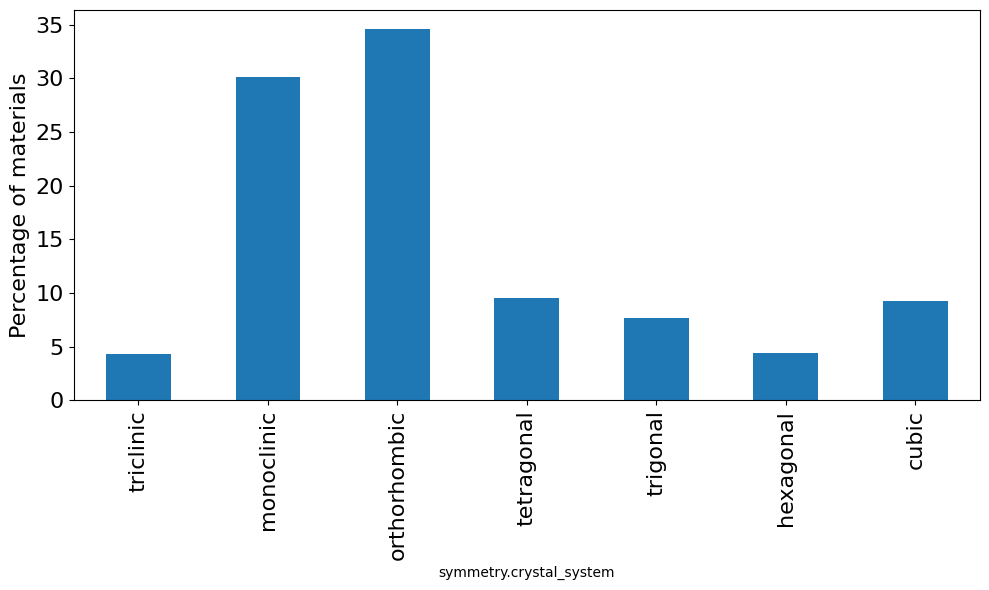

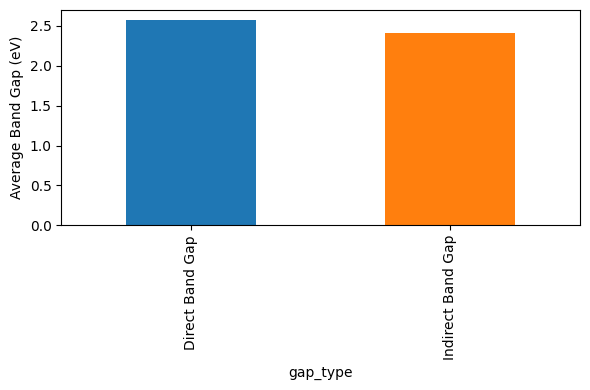

In [1]:
from mp_api.client import MPRester
import pandas as pd
import matplotlib.pyplot as plt

api_key = 'ncNeAsZOmf7KOxBjJcP4O8O1NBrWciqx'

with MPRester(api_key) as mpr:
    data = mpr.materials.summary.search(
        is_metal=False,
        theoretical=False,
        fields=['material_id', 'band_gap', 'symmetry', 'is_gap_direct']
    )

flattened = [{k: v for k, v in dict(d).items() if v is not None} for d in data]
mpids = pd.DataFrame.from_records(flattened)
mpids['symmetry.crystal_system'] = mpids['symmetry'].apply(lambda x: str(x.crystal_system).lower())
mpids = mpids.dropna(axis=1, how='all')
mpids = mpids.drop(columns=['symmetry', 'fields_not_requested'])
mpids.to_csv('mp_hw_data.csv')  # optionally saving to a csv file (so you don't have to re-query the data)

fig, ax = plt.subplots(tight_layout=True, figsize=(10,6))
p_materials = (mpids.loc[mpids['is_gap_direct'] == True, 'symmetry.crystal_system'].value_counts(normalize=True)*100
                    ).reindex(['triclinic', 'monoclinic', 'orthorhombic', 'tetragonal', 'trigonal', 'hexagonal', 'cubic'])

p_materials.plot(kind='bar', ax=ax, fontsize=16, legend=False)
ax.set_ylabel('Percentage of materials', fontsize=16)
plt.show()

# Monoclinic and orthorhombic are the highest. They have lower symmetry which means their structures are more flexible and capable of direct band gaps

mpids['gap_type'] = mpids['is_gap_direct'].map({True: 'Direct Band Gap', False: 'Indirect Band Gap'})
avg_gap = mpids.groupby('gap_type')['band_gap'].mean()

plt.figure(figsize=(6,4))
avg_gap.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Average Band Gap (eV)')
plt.tight_layout()
plt.show()

# I do not observe a pronounced difference

### Assignment 3

Please, go through the two papers: `Resources/Papers/Scheffler_Nature_22_FAIR Data and MSE.pdf` and `Resources/Papers/Wang_Chem_Mat_20_Best Practices ML.pdf`. As you go through them, please use the highlighter tool in your PDF viewing software and mark a few sentences that seem critical to you. Add the two PDFs with your highlights to the repository before submission.

### Assignment 4

Please, go through the [sites module](https://github.com/materialsproject/pymatgen/blob/master/src/pymatgen/core/sites.py) of Pymatgen and identify the OOP concepts that we covered in class. Summarize what this module does and which dunder methods they utilize (some of which we haven't discussed in class and some we have). What's the difference between a `Site` and a `PeriodicSite`?

A list of *all* dunder methods in Python can be found [here](https://www.pythonmorsels.com/every-dunder-method/).

In [ ]:
# This module defines how individual atomic sites are represented in the pymatgen library.

# Dunder methods utilized:

__future__ - enables specific Python feature flags
__init__ - object creation
__getattr__ - only called after Python fails to gind a given attribute
__getattribute__ - called for every attribute access
__getitem__ - get the occupancy for element
__eq__ - site is equal to another site if the species and occupancies are the same, and the coordinates are the same to some tolerance
__name__ - name of a function, classes, or module
__hash__ - minimally effective hash function that just distinguishes between Sites with different elements
__contains__ - identifies existence
__repr__ - customizes an object's string representation
__lt__ - set a default sort order for atomic species by eneg
__str__ - string conversion
__module__ - module name for a function or class
    
# Sites are non-periodic sites that represent a point in Cartesian space that can host one or more atoms
# PeriodicSites extend Sites to include crystal periodicity using a Lattice object
